In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [34]:
df = pd.read_csv("data/MITRE_satellites.csv", parse_dates=True)
df['Launch Date - Actual from Launch Events'] = pd.to_datetime(df['Launch Date - Actual from Launch Events'])
df.tail(20)

,Spacecraft Name,Spacecraft Life Cycle Phase,Spacecraft Life Cycle Disposal Reason,Launch Outcome,Spacecraft Type,Spacecraft Subtype,Spacecraft Service Type,Spacecraft Missions/Payloads,Orbit Type,Primary Spacecraft on Launch,...,Launch Code,Launch Organization Name,Launch Organization Country,Integrator Name,Launch Date - Actual from Launch Events,Launch Vehicle Name,Name of Launch Site,Launch Site Country,Launch Contract Sign Date,Launch Event - Total # of Spacecraft
4074,Yunhai 2-06,Deployment,NaN,Success,Satellite,Satellite,Government-Civil,Earth Observation,SSO,No,...,2018-12-29-9253,China Aerospace Science and Technology Corpora...,China,NaN,2018-12-29,Long March 2D,Jiuquan Satellite Launch Center,China,NaN,7
4075,ZA-AeroSat (QB50 AZ01),Deployment,NaN,Success,Satellite,CubeSat,Non-Profit,Development,LEO,No,...,2017-4-18-8962,United Launch Alliance,USA,Nanoracks,2017-04-18,Atlas V 401,Cape Canaveral Space Force Station,USA,NaN,40
4076,ZACUBE 1,Disposal,Inactive,Success,Satellite,CubeSat,Non-Profit,Development,SSO,No,...,2013-11-21-7490,ISC Kosmotras,Russia,NaN,2013-11-21,Dnepr,Dombarovskiy Air Base,Russia,11/21/2011,32
4077,ZACUBE 2,Deployment,NaN,Success,Satellite,CubeSat,Non-Profit,Development,SSO,No,...,2018-12-27-9247,Russian Ministry of Defense,Russia,ISILaunch,2018-12-27,Soyuz 2.1a,Vostochny Cosmodrome,Russia,NaN,28
4078,Zafar 1,Disposal,Launch Failure,Failure,Satellite,Satellite,Non-Profit,Earth Observation: Optical,LEO,Yes,...,2020-2-9-9409,Iranian Space Agency,Iran,NaN,2020-02-09,Simorgh,Semnan Province,Iran,NaN,1
4079,ZDPS 2A,Deployment,NaN,Success,Satellite,Satellite,Non-Profit,Development,LEO,No,...,2015-9-20-8677,China Aerospace Science and Technology Corpora...,China,NaN,2015-09-20,Long March 6,Taiyuan Satellite Launch Center,China,NaN,20
4080,ZDPS 2B,Deployment,NaN,Success,Satellite,Satellite,Non-Profit,Development,LEO,No,...,2015-9-20-8677,China Aerospace Science and Technology Corpora...,China,NaN,2015-09-20,Long March 6,Taiyuan Satellite Launch Center,China,NaN,20
4081,Zhangheng 1 (CSES),Deployment,NaN,Success,Satellite,Satellite,Government-Civil,Earth Observation,SSO,Yes,...,2018-2-2-9066,China Aerospace Science and Technology Corpora...,China,NaN,2018-02-02,Long March 2D,Jiuquan Satellite Launch Center,China,NaN,7
4082,Zhaojin 1,Deployment,NaN,Success,Satellite,CubeSat,Non-Profit,Scientific,SSO,No,...,2018-10-29-9141,China Aerospace Science and Technology Corpora...,China,NaN,2018-10-29,Long March 2C,Jiuquan Satellite Launch Center,China,NaN,7
4083,Zhongdianwangtong 1A,Deployment,NaN,Success,Satellite,Satellite,Government-Civil,Development,LEO,No,...,2019-6-5-9313,China Aerospace Science and Technology Corpora...,China,NaN,2019-06-05,Long March 11,Yellow Sea Launch Platform,China,NaN,7


In [3]:
print(df.columns)

Index(['Spacecraft Name', 'Spacecraft Life Cycle Phase',
       'Spacecraft Life Cycle Disposal Reason', 'Launch Outcome',
       'Spacecraft Type', 'Spacecraft Subtype', 'Spacecraft Service Type',
       'Spacecraft Missions/Payloads', 'Orbit Type',
       'Primary Spacecraft on Launch',
       'Launch Event - Internationally Competed',
       'Operator - Organization Name', 'Operator  - Country',
       'Prime Manufacturer - Organization Name',
       'Prime Manufacturer - Country', 'Prime Manufacturer - City',
       'Prime Manufacturer - State', 'Mass Estimated', 'Mass at Launch kg',
       'Launch Code', 'Launch Organization Name',
       'Launch Organization Country', 'Integrator Name',
       'Launch Date - Actual from Launch Events', 'Launch Vehicle Name',
       'Name of Launch Site', 'Launch Site Country',
       'Launch Contract Sign Date', 'Launch Event - Total # of Spacecraft'],
      dtype='object')


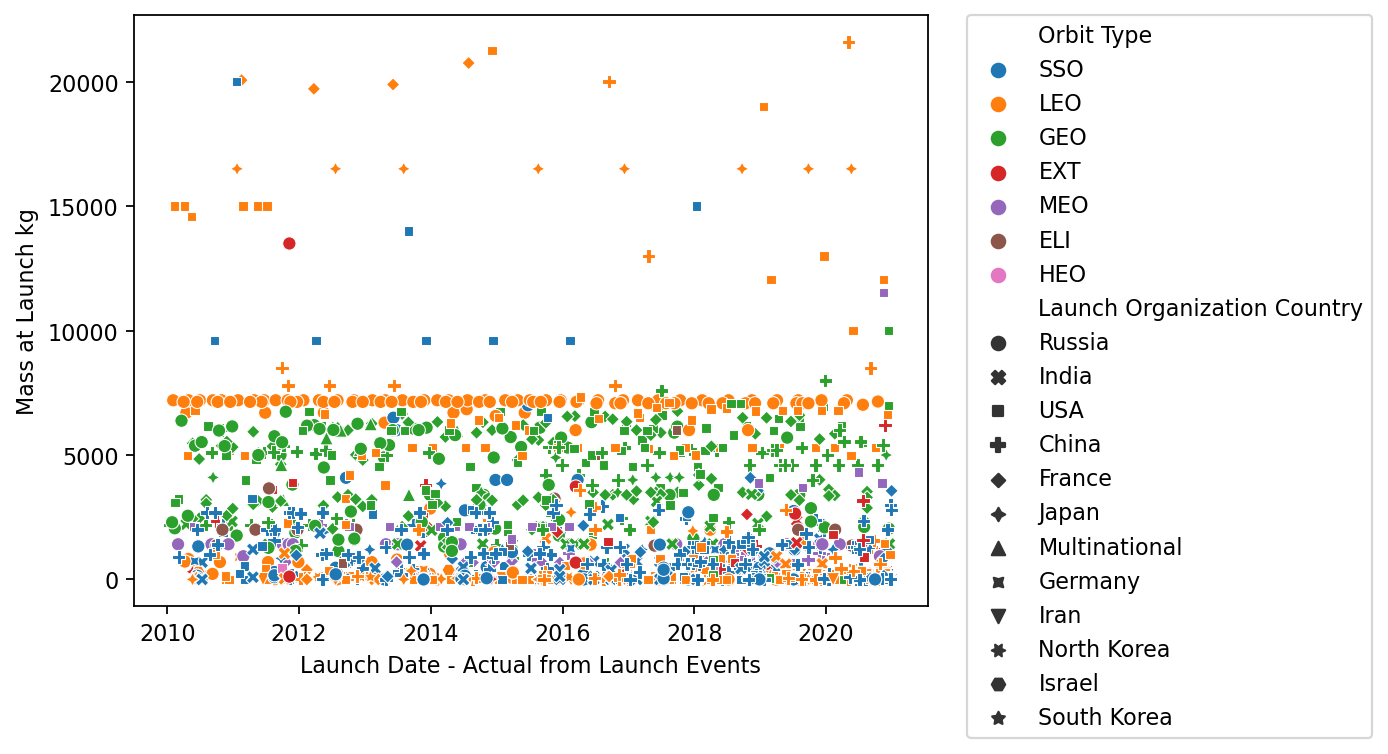

In [4]:
sns.scatterplot(df, x = 'Launch Date - Actual from Launch Events', y = 'Mass at Launch kg', 
                hue = 'Orbit Type', style = 'Launch Organization Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
fig = plt.gcf()
fig.set_dpi(160)


Text(0.5, 1.0, 'Rolling Sum of Satellite Launch Weight')

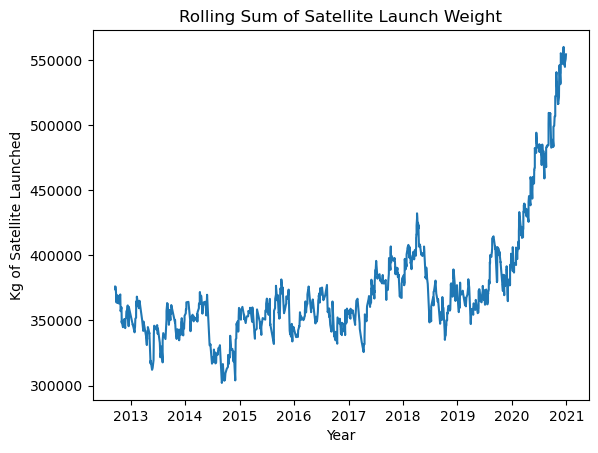

In [5]:
launch_mass = df[['Launch Date - Actual from Launch Events', 'Mass at Launch kg']]
launch_mass = launch_mass.set_index('Launch Date - Actual from Launch Events').sort_index()
plt.plot((launch_mass['Mass at Launch kg'].rolling(pd.Timedelta(360, "d")).sum())[360:])
plt.xlabel("Year")
plt.ylabel("Kg of Satellite Launched")
plt.title("Rolling Sum of Satellite Launch Weight")


In [6]:
#Let's get set of unique launch vehicles and display the top 10 (should i sort by kg launched?)
string = 'Launch Vehicle Name'
print(f'There are {len(set(df[string]))} unique launch vehicles')
print(f'{df[string].value_counts(ascending=False)[:15]}')


There are 112 unique launch vehicles
Falcon 9 Block 5           1012
PSLV XL                     264
Soyuz 2.1b                  264
Soyuz 2.1a                  204
Atlas V 401                 156
Electron                    113
Ariane 5 ECA                106
Antares 120                 103
Vega                         96
Long March 2D                93
Falcon 9 FT                  93
Falcon 9 Block 5 Dragon      89
Dnepr                        89
Proton M/Breeze-M            78
Antares 230                  70
Name: Launch Vehicle Name, dtype: int64


# Total Launch Costs Index


## 1. First we will need to create a dictionary between Platform and Cost/perKG. In the future, we will augment key with orbit type


In [35]:
mitre = pd.read_csv('data/mitre_matched_satellite.csv', index_col = 0, parse_dates=True)

launch_costs = pd.read_csv('Cost_KG/cost_per_kg_aggregated.csv', index_col = 0)
launch_costs_dict = pd.Series(launch_costs['cost_per_kg'].values, index= launch_costs['Platform']).to_dict()

print(launch_costs_dict)

{'Angaras': 4500.0, 'Antares': 13600.0, 'Ariane 44': 18300.0, 'Ariane 5G': 10200.0, 'Athena 1': 19200.0, 'Atlas Centaur': 29500.0, 'Atlas II': 18700.0, 'Atlas III': 16000.0, 'Atlas V': 8100.0, 'Delta 3000': 21400.0, 'Delta 3910': 32800.0, 'Delta E': 177900.0, 'Delta II': 38800.0, 'Delta III': 18000.0, 'Delta IV': 10400.0, 'Delta IV Heavy': 11600.0, nan: 9600.0, 'Electron': 23100.0, 'Epsilon': 34500.0, 'Falcon 1': 12600.0, 'SpaceX Falcon 9': 2600.0, 'SpaceX Falcon Heavy': 1500.0, 'GSLV': 10000.0, 'H-II': 10500.0, 'Kosmos': 14900.0, 'Kuaizhou': 10600.0, 'LVM3': 8000.0, 'Long March 11': 10600.0, 'Long March 2A': 8700.0, 'Long March 2C': 8300.0, 'Long Marche 2D': 9100.0, 'Long Marche 2E': 9900.0, 'Long March 3B': 6200.0, 'Long March 4B': 7600.0, 'Long March 5': 7900.0, 'M-V': 45800.0, 'Minotaur I': 73100.0, 'Minotaur IV': 30500.0, 'PSLV': 8500.0, 'Pegasus': 41100.0, 'Pegasus XL': 50600.0, 'Proton': 8200.0, 'R-36 / Cyclone': 8400.0, 'Rokot': 20600.0, 'Saturn V': 5400.0, 'Scout': 118500.0, '

## 2. Now, map each launch into a cost amount by transforming cost/kg with total kg of spaceflight

In [156]:
mitre['total cost'] = mitre.apply(lambda row: launch_costs_dict[row['Platform']]*row['Mass at Launch kg'] if row['Platform'] in launch_costs_dict else 0, axis = 1)
mitre['cost_kg'] = mitre.apply(lambda row: launch_costs_dict[row['Platform']] if row['Platform'] in launch_costs_dict else np.nan, axis = 1)
display(mitre[['Launch Vehicle Name', 'total cost', 'Spacecraft Missions/Payloads']])

,Launch Vehicle Name,total cost,Spacecraft Missions/Payloads
0,Dnepr,1440.0,Development
1,Dnepr,9600.0,Development
2,H-IIA 202,6211200.0,Scientific
3,H-IIA 202,20352000.0,Earth Observation
4,Angara A5,19603200.0,Test
...,...,...,...
4109,3110 Taurus XL,34600.0,Development
4110,Shavit 2,11818000.0,Intelligence: Imagery Intelligence (IMINT)
4111,Shavit 2,9330000.0,Intelligence: Imagery Intelligence (IMINT)
4112,Shavit 2,9330000.0,Intelligence: Imagery Intelligence (IMINT)


## Inflation deflator

## 3. Finally, create a rolling sum over the cost with date as the index to get a rough version of a launch cost index

Text(0.5, 1.0, 'Index of Satellite Launch Cost')

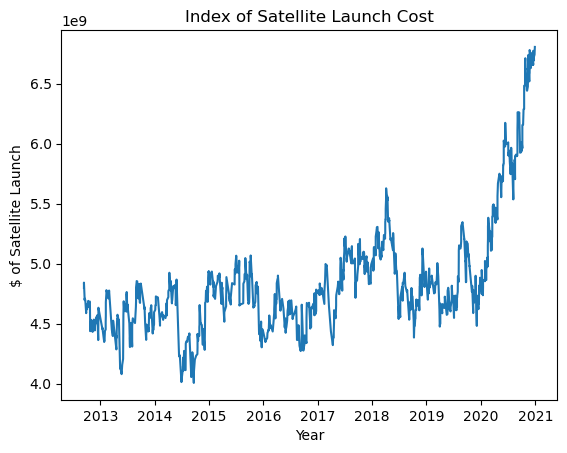

In [28]:
mitre['Launch Date - Actual from Launch Events'] = pd.to_datetime(mitre['Launch Date - Actual from Launch Events'])
launch_cost = mitre[['Launch Date - Actual from Launch Events', 'total cost']]
launch_cost = launch_cost.set_index('Launch Date - Actual from Launch Events').sort_index()
launch_index = launch_cost['total cost'].rolling(pd.Timedelta(360, "d")).sum()[360:]
plt.plot((launch_cost['total cost'].rolling(pd.Timedelta(360, "d")).sum())[360:])
plt.xlabel("Year")
plt.ylabel("$ of Satellite Launch")
plt.title("Index of Satellite Launch Cost")

## 4. We can also decompose this index into the mission of each satellite to understand which segments/services of the satellite industry are driving launch demand at any given time


In [104]:
#First need to understand which segmens we have:
num_segments = len(mitre['Spacecraft Missions/Payloads'].unique())
print(f'Number of services: {num_segments}')
print(mitre['Spacecraft Missions/Payloads'].value_counts())

#Now lets define our own lis of important segments (we want broad general categories, can get more specific later if we really want to)
segments = ['Communications', 'Development', 'Earth Observation', 'Scientific', 'Meteorological', 'Navigation', 'Intelligence', 'Cargo Transport', 'Crew Transport', 'Other']

#Now map each subcategory into a general one:
def map_general(x):
    x = x.replace(':','')
    for segment in segments:
        if segment in x:
            return segment
    return 'Other'

mitre['segment'] = mitre.apply(lambda row: map_general(row['Spacecraft Missions/Payloads']), axis = 1)


Number of services: 59
Communications: Broadband                                                                                                 895
Development                                                                                                               733
Communications                                                                                                            632
Earth Observation                                                                                                         594
Scientific                                                                                                                194
Earth Observation: Optical                                                                                                168
Meteorological                                                                                                            156
Navigation                                                                                     

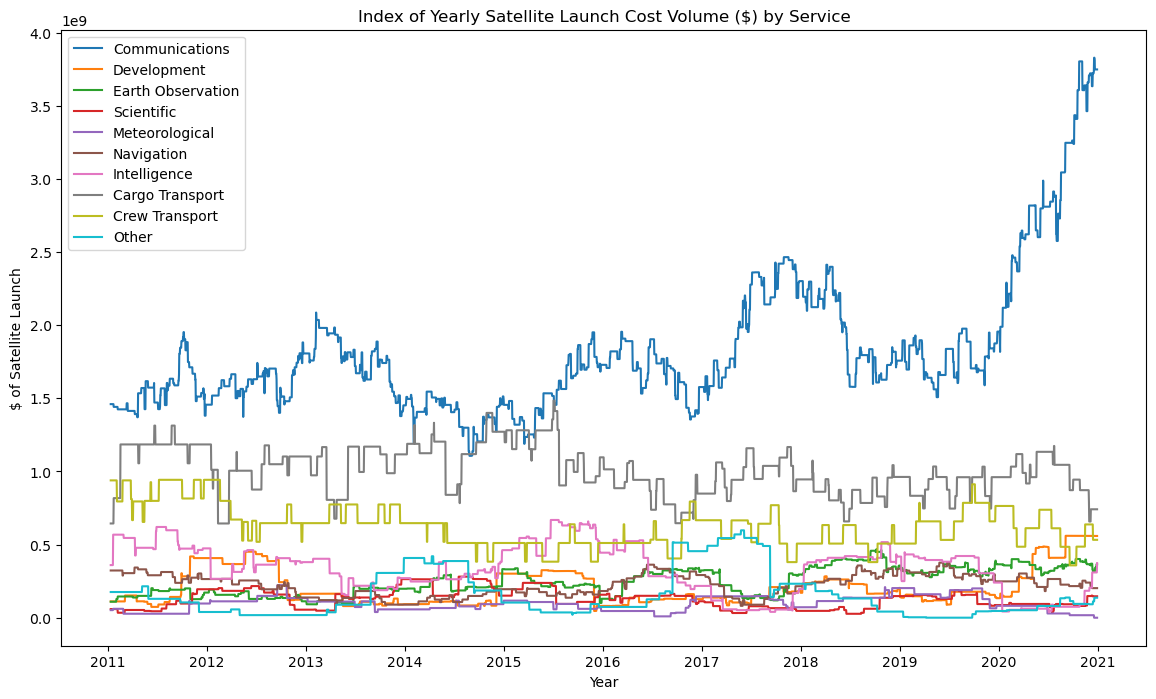

In [106]:
## Now let's plot these different segments
mitre['Launch Date - Actual from Launch Events'] = pd.to_datetime(mitre['Launch Date - Actual from Launch Events'])
true_idx = pd.date_range(mitre['Launch Date - Actual from Launch Events'].sort_values().values[0], mitre['Launch Date - Actual from Launch Events'].sort_values().values[-1])
segment_series = [mitre.loc[mitre['segment'] == seg, ['Launch Date - Actual from Launch Events', 'total cost', 'segment']] for seg in segments]
segment_series = [series.groupby('Launch Date - Actual from Launch Events').sum(numeric_only = True) for series in segment_series]
segment_series = [series.sort_index() for series in segment_series]
segment_series = [series.reindex(true_idx, fill_value = 0.0) for series in segment_series]

segment_index =  [(seg, series['total cost'].rolling('360d', min_periods = None).sum()[360:]) for seg, series in zip(segments, segment_series)]


for index in segment_index:
    plt.plot(index[1], label = index[0])

plt.legend()
plt.xlabel("Year")
plt.ylabel("$ of Satellite Launch")
plt.title("Index of Yearly Satellite Launch Cost Volume ($) by Service")
fig = plt.gcf()
fig.set_size_inches((14, 8))


In [ ]:
#Stack plot
sns.set_theme()
plt.stackplot(

In [ ]:
#Top 3 Sectors plot

In [ ]:
#Rest of the sectors plot

## What is the development sector
These are spacecraft typically from the government, universities, or non-profits that demonstrate some new technological capability and are not revenue producing. These can be though of more as R&D spacecraft which demonstrate some POC, and to some degree can be combined with the Scientific sector. Just a couple of examples:

 SINOD-D (SRI International NanoSat Orbital Demonstration): (One of the technologies demonstrated on these satellites is a high-speed data downlink for wide-bandwidth CubeSat payloads via software defined radio communications)

 Prometheus : Series of 1.5U CubeSats for technology development and demonstration. It was developed by the Los Alamos National Laboratory (LANL) with the dual objective of evaluating new low-cost development and operations methodologies while also assessing the operational utility that can be provided with CubeSat technology.

UAPSat 1 (Universidad Alas Peruanas Satellite) : s a Peruvian satellite built by the Institute for Radio Astronomy of the Pontificia Universidad Católica del Perú (INRAS-PUCP).


## Going from Cost Volume (Market Size) to Typical Cost

If we're trying to get a grasp on how costs have declined over the past decade with respect to launch cost, we can compute some sort of weighted average cost within the sliding window of our index. Consider a time $i$ where we take all of the launches in the time frame $[i-364, i]$ and compute the total launch mass in our time frame $\sum_{l \in \text{launches}} \text{mass}_{l} = \mathbb{L}_{i}$. From this we can compute a weighted average of the launch cost for our time period $\mathbb{I}_{i}$: 

\begin{equation}
    \mathbb{I}_{i} = \sum_{l \in \text{launches}} \frac{\text{mass}_{l}}{\mathbb{L}_{i}} \cdot \text{cost per kg}_{l}
\end{equation}


This will essentially give us a mass-weighted launch cost index. Now we can see a plot through time about the cost of launching a kg of matter into space, with no further specializiation to orbit type or consumer sector. There could be more insight to be gained since this will over-estimate launch cost in the non government sector. 

In [185]:
mitre['Launch Date - Actual from Launch Events'] = pd.to_datetime(mitre['Launch Date - Actual from Launch Events'])
mass_weighted_cost_df = mitre[['Launch Date - Actual from Launch Events', 'cost_kg', 'Mass at Launch kg']]
mass_weighted_cost_df = mass_weighted_cost_df.dropna(axis = 0)
true_idx = pd.date_range(mitre['Launch Date - Actual from Launch Events'].sort_values().values[0], mitre['Launch Date - Actual from Launch Events'].sort_values().values[-1])


#Note I didn't have time to try and do exactly what I wanted in pandas, but from a style standpoint, would have been better to do a rolling function on the df with a custom lambda function
cost_index_list = list()
average_mass = list()
cost_index_date = list()
for date in true_idx:
    d_range = date - pd.Timedelta(days=364)
    filtered = mass_weighted_cost_df[mass_weighted_cost_df['Launch Date - Actual from Launch Events'].between(d_range, date, inclusive=True)]
    total_mass = filtered['Mass at Launch kg'].sum()
    mass_averaged_cost = ((filtered['Mass at Launch kg'] * filtered['cost_kg']) / total_mass).sum()
    cost_index_list.append(mass_averaged_cost)
    cost_index_date.append(date)
    average_mass.append(filtered['Mass at Launch kg'].mean())

cost_index_list, cost_index_date, average_mass = cost_index_list[365:], cost_index_date[365:], average_mass[365:]
cost_index = pd.DataFrame({'Date': cost_index_date, 'cost': cost_index_list, 'avg_mass': average_mass})
cost_index = cost_index.set_index('Date')



/var/folders/ym/12ywlj9n1t5f9bzv6pv8v0km0000gn/T/ipykernel_18886/2894831384.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  filtered = mass_weighted_cost_df[mass_weighted_cost_df['Launch Date - Actual from Launch Events'].between(d_range, date, inclusive=True)]


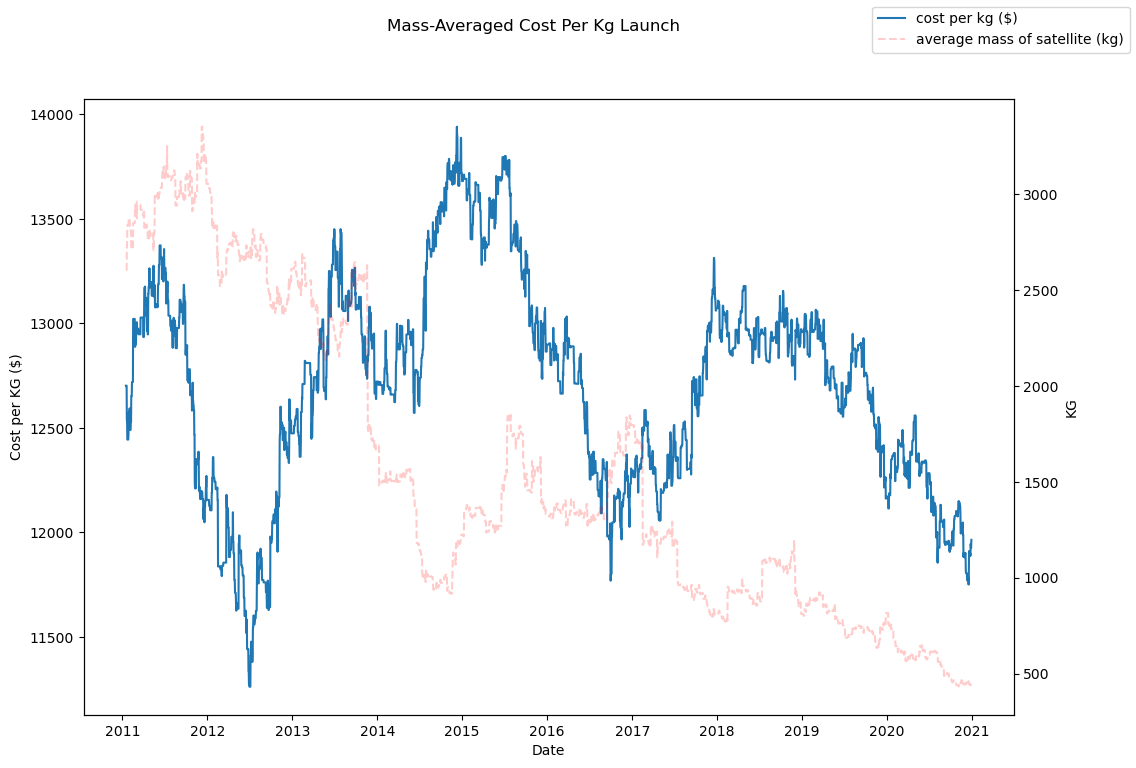

In [191]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(cost_index['cost'], label = 'cost per kg ($)')
ax2.plot(cost_index['avg_mass'], label = 'average mass of satellite (kg)', color = 'red', linestyle = '--', alpha = 0.2)

fig.suptitle("Mass-Averaged Cost Per Kg Launch")
ax1.set_xlabel("Date")
ax1.set_ylabel("Cost per KG ($)")
ax2.set_ylabel("KG")
fig.legend()


fig.set_size_inches((12,8))


## TC averaged Plot

## Can we find the satellite TV dip?

Within our dataset, there are only 3 satellites launched by DirectTV (DirecTV14, DirectTV15, DirectTV16). This doesn't seem enough to constitute enough of a satellite weight magnitude to register on our index. In order to see this dip, we would need to look at revenue DERIVED from satellite assets, not mass of satellite launched. 




## Getting more granular on launch costs -- i.e. incorporating inflation and orbit type

First, let's try and see which orbit type / launch vehicle combinations are the most frequent so that we can search for the most important ones first. Our current launch cost per kg database isn't granular enough and needs to be supplememted with year and orbit type to be more accurate. 

Launch Type
Long Marche 2D SSO    3.656380e+08
Soyuz ELI             3.819860e+08
nan GEO               3.972864e+08
Atlas V SSO           4.123548e+08
Delta IV LEO          4.186000e+08
Long March 4B SSO     4.190815e+08
Long March 2A GEO     5.209560e+08
Atlas V LEO           5.638208e+08
Long March 2C SSO     6.976814e+08
Delta IV SSO          7.092800e+08
Delta IV GEO          8.009872e+08
Soyuz MEO             8.038174e+08
Antares LEO           9.280439e+08
nan LEO               9.345744e+08
Atlas V GEO           1.173042e+09
Long March 2A LEO     1.188524e+09
Long March 3B GEO     1.254093e+09
H-II LEO              1.387260e+09
Soyuz SSO             1.455683e+09
Ariane 44 LEO         1.471558e+09
Falcon 1 GEO          1.961631e+09
Proton GEO            2.548745e+09
Falcon 1 LEO          6.465015e+09
Ariane 44 GEO         8.322291e+09
Soyuz LEO             1.270222e+10
Name: total cost, dtype: float64


(array([68., 13.,  4.,  4.,  3.,  3.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([3.46000000e+04, 2.54078298e+08, 5.08121995e+08, 7.62165693e+08,
        1.01620939e+09, 1.27025309e+09, 1.52429679e+09, 1.77834048e+09,
        2.03238418e+09, 2.28642788e+09, 2.54047158e+09, 2.79451527e+09,
        3.04855897e+09, 3.30260267e+09, 3.55664637e+09, 3.81069006e+09,
        4.06473376e+09, 4.31877746e+09, 4.57282116e+09, 4.82686485e+09,
        5.08090855e+09, 5.33495225e+09, 5.58899595e+09, 5.84303964e+09,
        6.09708334e+09, 6.35112704e+09, 6.60517074e+09, 6.85921444e+09,
        7.11325813e+09, 7.36730183e+09, 7.62134553e+09, 7.87538923e+09,
        8.12943292e+09, 8.38347662e+09, 8.63752032e+09, 8.89156402e+09,
        9.14560771e+09, 9.39965141e+09, 9.65369511e+09, 9.90773881e+

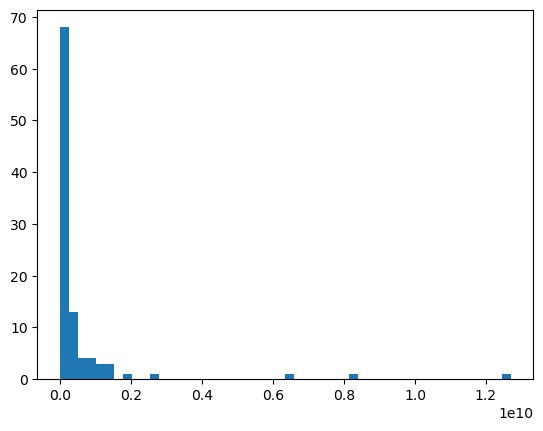

In [155]:
mitre['Launch Type'] = mitre['Platform'].astype(str) +  " " +  mitre['Orbit Type'].astype(str)
#print(mitre.groupby('Launch Type').count())
print((mitre.groupby('Launch Type')['total cost'].sum()).sort_values()[-25:])
plt.hist(mitre.groupby('Launch Type')['total cost'].sum(), bins = 50)


### Note that this proxy for the space economy can be a little shortsighted since it only fixates on the costs associated with launching, if instead we could create a model to valuate the spaceflight, we might have a better proxy for measuring the progression of the space economy. The reason for this is that costs are constantly being improved by the launch providers, so we might see an uptick in the valuation of space assets being deployed, but this might not be reflected if costs are decreasing at a similar rate. 


